In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data source: https://www.nu3.de/blogs/nutrition/food-carbon-footprint-index-2018

In [58]:
food_consumption = pd.read_csv('food_consumption.csv',index_col = 0)

In [23]:
# pd.read_csv?

In [59]:
food_consumption

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96
...,...,...,...,...
1426,Bangladesh,dairy,21.91,31.21
1427,Bangladesh,wheat,17.47,3.33
1428,Bangladesh,rice,171.73,219.76
1429,Bangladesh,soybeans,0.61,0.27


In [46]:
# Subset country for USA: usa_consumption
usa_consumption = food_consumption[food_consumption['country']=='USA']
print(usa_consumption)

   country food_category  consumption  co2_emission
56     USA          pork        27.64         97.83
57     USA       poultry        50.01         53.72
58     USA          beef        36.24       1118.29
59     USA     lamb_goat         0.43         15.06
60     USA          fish        12.35         19.72
61     USA          eggs        14.58         13.39
62     USA         dairy       254.69        362.78
63     USA         wheat        80.43         15.34
64     USA          rice         6.88          8.80
65     USA      soybeans         0.04          0.02
66     USA          nuts         7.86         13.91


## Mean, Median and Mode

In [6]:
# Calculate mean consumption in USA
print(np.mean(usa_consumption['consumption']))

44.650000000000006


In [7]:
# Calculate median consumption in USA
print(np.median(usa_consumption['consumption']))

14.58


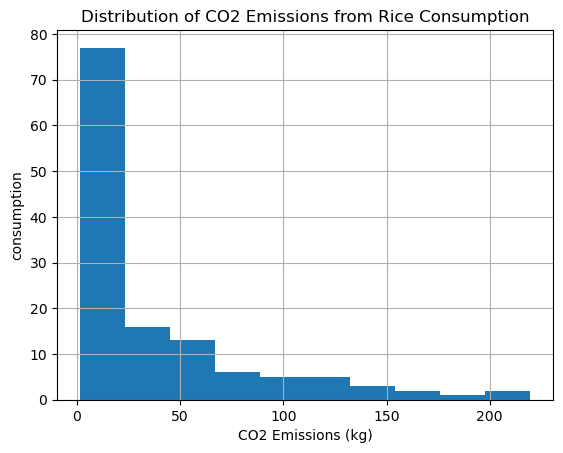

In [52]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category']=='rice']

# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
# rice_consumption.plot(kind='hist')
plt.title('Distribution of CO2 Emissions from Rice Consumption')
plt.xlabel('CO2 Emissions (kg)')
plt.ylabel('consumption')
plt.show()


Is it left skewed or right skewed?

In [60]:
rice_consumption = food_consumption[food_consumption['food_category']=='rice']
rice_consumption

,country,food_category,consumption,co2_emission
9,Argentina,rice,8.77,11.22
20,Australia,rice,11.03,14.12
31,Albania,rice,7.78,9.96
42,Iceland,rice,3.89,4.98
53,New Zealand,rice,9.16,11.72
...,...,...,...,...
1384,Sierra Leone,rice,103.30,132.19
1395,Sri Lanka,rice,109.72,140.41
1406,Indonesia,rice,134.62,172.27
1417,Liberia,rice,94.75,121.25


In [61]:
# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg('mean'))

37.59161538461538


## Variance and standard deviation

In [68]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('country')['consumption'].agg(['mean','std','var'])).sort_values(ascending=False)

# Create histogram of co2_emission for food_category 'beef'
# food_consumption[food_consumption['food_category']=='beef']['co2_emission'].hist()
# plt.show()

# Create histogram of co2_emission for food_category 'eggs'
# food_consumption[food_consumption['food_category']=='eggs']['co2_emission'].hist()
# plt.show()

                mean        std          var
country                                     
Albania    48.430000  93.247250  8695.049680
Algeria    33.137273  65.245767  4257.010102
Angola     10.544545  11.586943   134.257247
Argentina  39.037273  60.692914  3683.629762
Armenia    37.010000  68.207337  4652.240780
...              ...        ...          ...
Uruguay    39.418182  64.408174  4148.412816
Venezuela  25.217273  34.944537  1221.120662
Vietnam    24.430909  41.150238  1693.342049
Zambia      5.191818   3.440139    11.834556
Zimbabwe    8.778182  11.641294   135.519736

[130 rows x 3 columns]


AttributeError: 'NoneType' object has no attribute 'sort_values'

In [62]:
food_consumption

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96
...,...,...,...,...
1426,Bangladesh,dairy,21.91,31.21
1427,Bangladesh,wheat,17.47,3.33
1428,Bangladesh,rice,171.73,219.76
1429,Bangladesh,soybeans,0.61,0.27


# Quantiles / Percentiles

In [72]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],[0,.25,0.5,0.75,1]))

[   0.        5.21     16.53     62.5975 1712.    ]


## Finding outliers using IQR

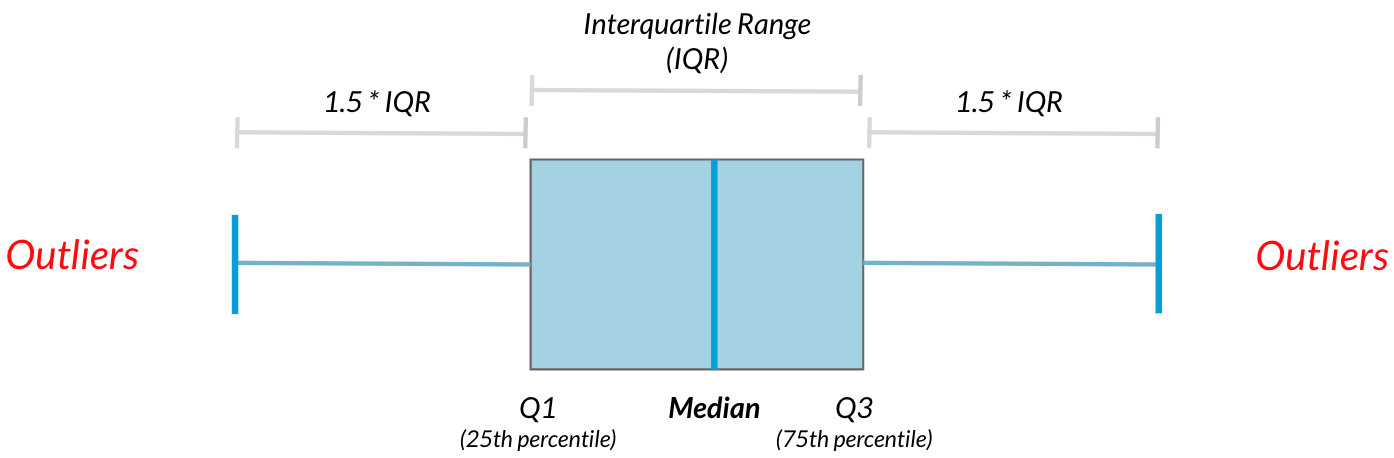

In [55]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].agg('sum')
emissions_by_country

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

In [32]:
# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country,0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 *iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country<lower) | (emissions_by_country>upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
